# Regresiones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

from sklearn.datasets import make_regression
plt.rcParams['figure.figsize'] = [10, 8]

## Regresión lineal

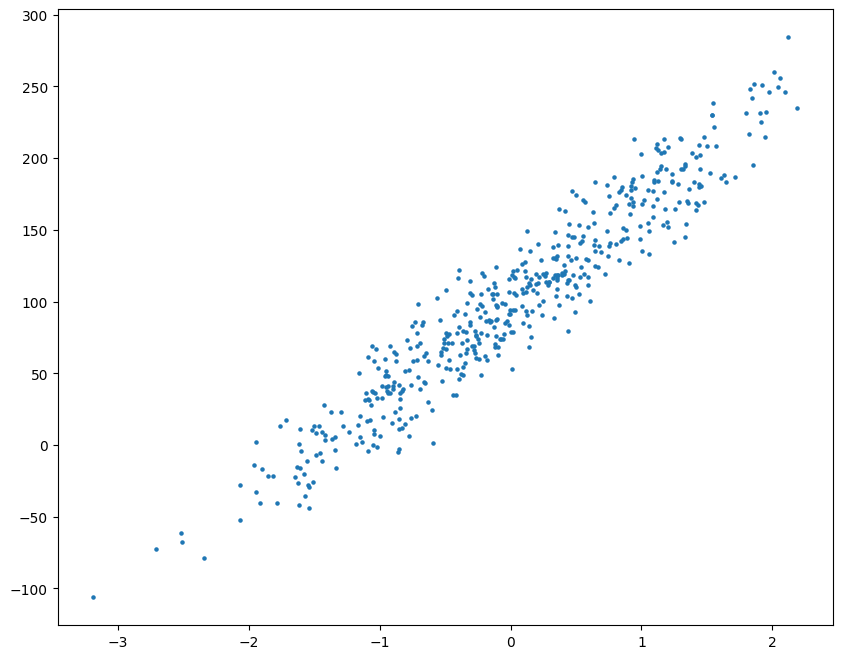

In [ ]:
#list(map(ord, 'pat'))
lin1 = make_regression(n_features=1, n_samples=500, noise=20,
                      bias=100, random_state=20)
plt.scatter(lin1[0], lin1[1], s=5)

$$
\lbrace (x_i, y_i) ;  x_i, y_i \in R \rbrace \\
y_i = f(x_i) + \epsilon
$$

La regresión lineal tiene crea una relación funcional entre la variable dependiente e independiente, donde las variables independientes tienen un caracter explicatorio. Estas variables están ponderadas por constantes $\beta$. La ecuación de dicha relación funcional es:

$$y_i = \beta_0 + \beta_1 x_{1,i} + \ldots + \beta_n x_{n,i} + \epsilon_i $$

Para nuestro análisis vamos a ocupar la forma matricial

$$
y = \left ( \begin{array} \\ y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right ),
X = \left ( \begin{array} \\
                          1       & x_{1,1} & \ldots & x_{1,n} \\
                          1       & x_{2,1} & \ldots & x_{2,n} \\
                          \vdots  & \vdots & \vdots & \vdots \\
                          1       & x_{m,1} & \ldots & x_{m,n} \end{array}  
     \right ) ,
\beta = \left ( \begin{array} \\ \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n   \end{array} \right ) ,
\epsilon = \left ( \begin{array} \\ \epsilon_0 \\ \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n   \end{array} \right )
$$

Entonces podemos replantear la expresión anterior en su forma matricial:

$$y = X \beta + \epsilon $$

donde $\beta$ es un vector de parámetros por conocer y $\epsilon$ es un vector de términos de ruido. Podemos computar el vector $\epsilon$ a partir de los datos por lo que tendríamos que hacer lo siguiente:



## Mínimos cuadrados y residuales

$$ y = X\beta + e $$

Donde $e$ puede ser computado de los datos

$$e = y - X\beta$$

Para determinar el estimador de mínimos cuadrados vamos a sumar todas los cuadrados de los residuales como función de $\beta$

$$ S(\beta) = \sum e_i^2 = (y-X\beta)'(y-X\beta) = y'y - y'X\beta - \beta'X'y + \beta'X'X\beta$$

Como lo que queremos es minimizar el error, lo que tenemos que hacer primero es derivar:

$$ \frac {\partial S(\beta)} {\partial \beta} = - y'X - X'y + 2X'X\beta$$

Y después igualar a 0

$$ 0 = - y'X - X'y + 2\cdot X'X\beta$$

De donde obtenemos

$$ 2X'X\beta = 2X'y \implies X'X\beta = X'y $$

Resolviendo para $\beta$

$$ (X'X)^{-1} \cdot X'X\beta = (X'X)^{-1} \cdot X'y \implies  \beta = (X'X)^{-1}X' y $$



In [ ]:
# concatenamos una columna de 1s
# para que a partir de esos 1s se pueda encontrar
# el sesgo asociado al modelo
#
X = np.concatenate((np.ones_like(lin1[0]), lin1[0]), axis=1)
X

array([[ 1.00000000e+00,  3.41434710e-01],
       [ 1.00000000e+00, -1.08650377e+00],
       [ 1.00000000e+00, -9.34937958e-01],
       [ 1.00000000e+00,  3.71400946e-01],
       [ 1.00000000e+00, -1.84801270e-01],
       [ 1.00000000e+00,  4.72277971e-01],
       [ 1.00000000e+00,  1.25754407e+00],
       [ 1.00000000e+00,  1.94474750e+00],
       [ 1.00000000e+00,  1.12013226e+00],
       [ 1.00000000e+00,  3.95538307e-01],
       [ 1.00000000e+00,  2.19234113e+00],
       [ 1.00000000e+00,  2.04005175e+00],
       [ 1.00000000e+00, -9.44611541e-01],
       [ 1.00000000e+00,  2.92956342e-01],
       [ 1.00000000e+00, -1.60942961e+00],
       [ 1.00000000e+00,  2.48059535e-02],
       [ 1.00000000e+00, -6.57647080e-01],
       [ 1.00000000e+00, -4.77532686e-01],
       [ 1.00000000e+00,  8.53926356e-01],
       [ 1.00000000e+00,  8.05669239e-01],
       [ 1.00000000e+00, -2.75814873e-01],
       [ 1.00000000e+00,  1.93057451e-01],
       [ 1.00000000e+00,  1.29755002e-01],
       [ 1.

In [ ]:
# aplicamos la operación derivada
# con anterioridad
# 𝛽=(𝑋′𝑋)^{−1}(𝑋′𝑦)
#
# haciéndolo por pasos queda así
# 𝑋′𝑋
t1 = X.T.dot(X)
t1

array([[500.        ,   7.42314105],
       [  7.42314105, 478.32775192]])

In [ ]:
y = lin1[1]
y;

In [ ]:
# los coeficientes son b0 y b1
#
terminos = np.linalg.inv(t1).dot(X.T)

b0, b1 = terminos.dot(y)
b0, b1

(np.float64(99.21382932830777), np.float64(67.78023652226139))

In [ ]:
# hacemos una función para el modelo lineal
#
modelo_lineal = lambda M, b, X : b + X.dot(M)


In [ ]:
# generamos una linea de puntos entre
# -3 y 3 (con 1000 puntos)
# donde vamos a probar nuestro modelo
#

# aplicamos el modelo ajustado
#regresion = b0 + Xd.dot(b1)
Xd = np.linspace(-3,3,1000)

regresion = modelo_lineal(b1, b0, Xd)

regresion;

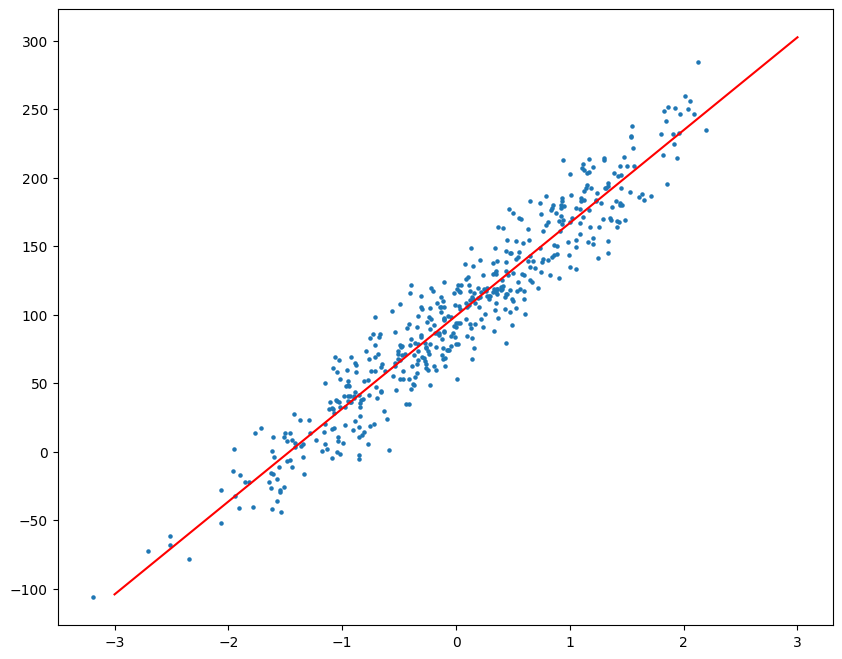

In [ ]:
plt.scatter(lin1[0], lin1[1], s=5)
plt.plot(Xd, regresion, '-r');

La intención de generar el modelo lineal (línea roja) es la de anticipar el valor de variables no vistas antes, por ejemplo ¿qué valor le correspondería cuando $x=5$?

In [ ]:
# x = 5
modelo_lineal(b1, b0, np.array([5]))

array([438.11501194])

## Regresión polinomial

Vamos a hacer ahora una regresión polinomial, es decir, detrás de los datos no hay una relación lineal del tipo
$$
y=mx + b
$$
Si no más bien
$$
y= mx^2 + nx +b
$$

Para este ejemplo vamos a generar unos puntos que sigan la relación
$$
y= 1.5x^2 + \frac{1}{2} x + 2
$$
y le vamos a agregar un poco de ruido

(Text(0.5, 0, 'X'), Text(0, 0.5, 'y'))

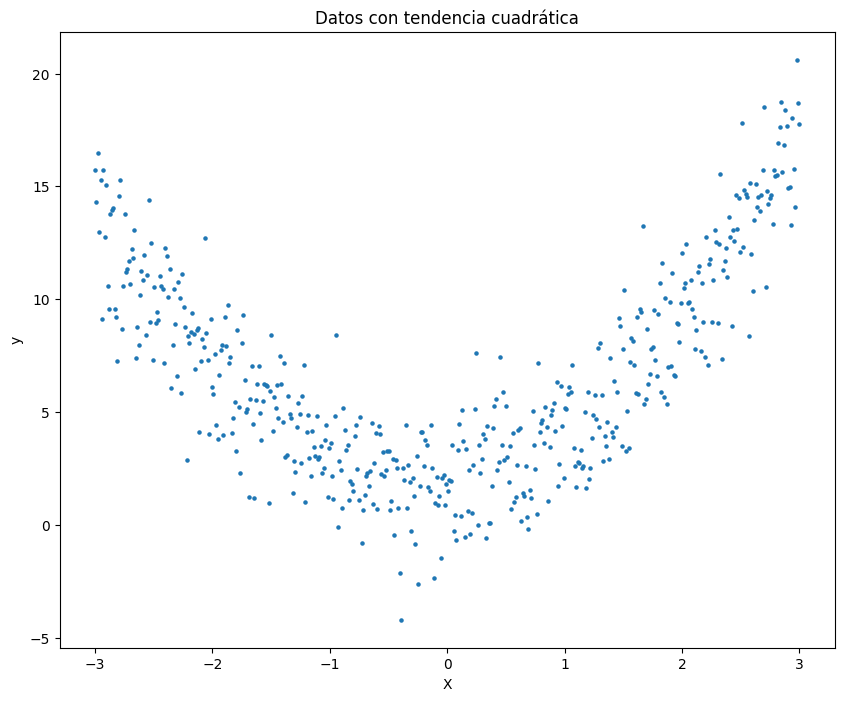

In [ ]:
n_samples = 500
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
y = 1.5 * X**2 + 0.5 * X + 2  # relación cuadrática
ruido = np.random.normal(scale=2.0, size=X.shape)  # ruido

yt = (y + ruido).ravel()
plt.scatter(X,yt, s=5)
plt.title("Datos con tendencia cuadrática")
plt.xlabel("X"), plt.ylabel("y")

Vamos a hacer el ajuste. Nuestra matriz de diseño la vamos a componer con coeficientes que guarden las
relaciones cuadráticas (muy similar al ejemplo lineal en el que pusimos los coeficientes constantes y luego los
lineales)

$$
X_f = [1 | X | X^2]
$$

donde $X$ e $y$ es el conjunto de datos original

Los coeficientes los podemos encontrar como lo hicimos con anterioridad

$$
\beta = (X_f' X_f)^{-1} X_f' y
$$

In [ ]:
# aplicamos la operación derivada
# con anterioridad
# 𝛽=(𝑋′𝑋)−1𝑋′𝑦
#
# Matriz de diseño
Xf = np.hstack([np.ones_like(X), X, X**2])

# Primer término
XtX = Xf.T @ Xf
XtX_inv = np.linalg.inv(XtX)

# Segundo término
Xty = Xf.T @ y
beta = XtX_inv @ Xty
beta

# beta.shape X.shape

array([[2. ],
       [0.5],
       [1.5]])

In [ ]:
# usamos las betas para obtener el valor de la predicción
#
# yh = b0 + b1x + b2x**2
yh = Xf @ beta

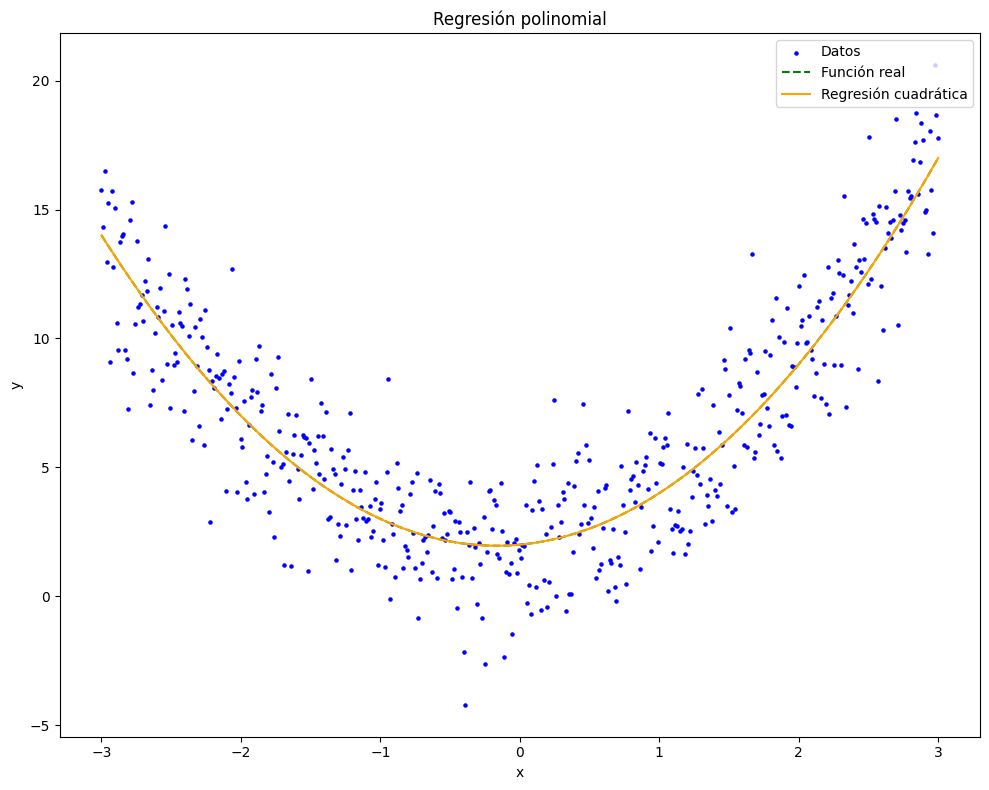

In [ ]:
# graficamos
yt = (y + ruido).ravel()

# plt.figure(figsize=(8, 5))
plt.scatter(X, yt, label="Datos",                color="blue", s=5)
plt.plot(X,    y,  label="Función real",         color="green", linestyle="dashed")
plt.plot(X,    yh, label="Regresión cuadrática", color="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión polinomial")
plt.legend(loc=1)
# plt.grid(True)
plt.tight_layout()
plt.show()

## Función sigmoide

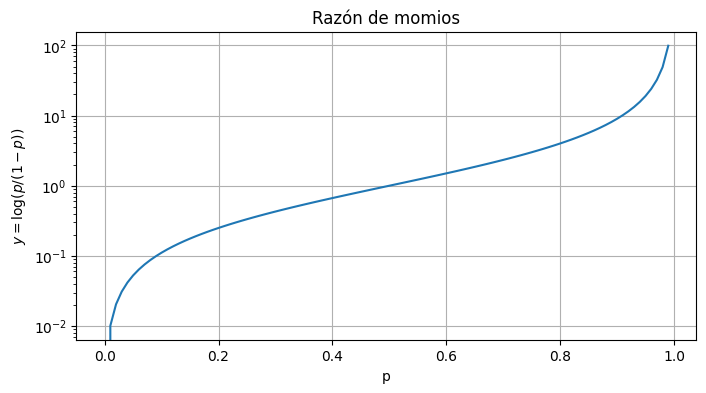

In [ ]:
p= np.arange(0,1,1/100)

y = p/(1-p)

fig=plt.figure(figsize=(8,4))
plt.semilogy(p,y)
plt.xlabel('p')
plt.ylabel(r'$y = \log(p/(1-p))$')
plt.title('Razón de momios')
plt.grid(True)
plt.show()

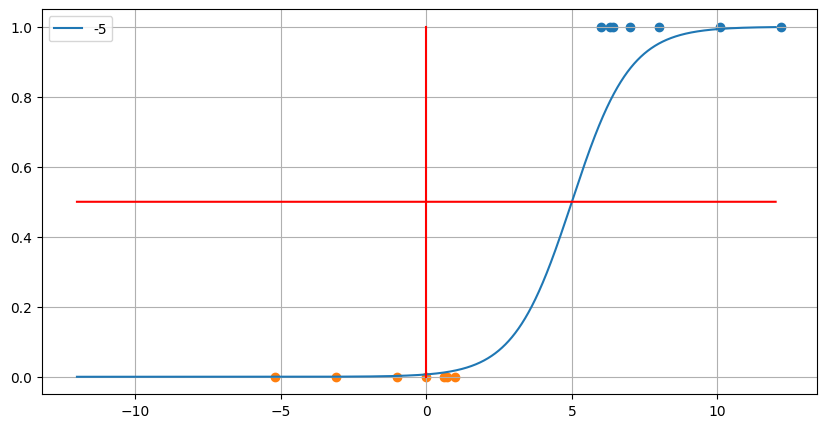

In [ ]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

X  = np.arange(-12,12,1/1000)
Y  = sigmoide(X)
Y2 = sigmoide(X+5)
Y3 = sigmoide(X-5)

C = np.array([[1.4,1],
              [1.3,1],
              [1,1],
              [2,1],
              [7.2,1],
              [5.1,1],
              [3,1]])

D = np.array([[1.4,0],
              [1.3,0],
              [1,0],
              [2,0],
              [7.2,0],
              [5.1,0],
              [3,0]])

fig = plt.figure(figsize=(10,5))
# plt.plot(X,Y, label="original")
# plt.plot(X,Y2, label="+5")
plt.plot(X,Y3, label="-5")
plt.plot([0.,0.], [0.,1.], 'r')
plt.plot(X, 0*Y+0.5, 'r')
plt.scatter(C[:,0]+5,C[:,1])
plt.scatter(-D[:,0]+2,D[:,1])

plt.grid()
plt.legend()

In [ ]:
C1 = np.array([[1.4,  1],
               [1.3,  1],
               [1.5,  1],
               [2,    1],
               [2.2,  1],
               [3.1,  1],
               [2.7,  1]])

C2 = np.array([[1.4,  0],
               [1.3,  0],
               [1.2,  0],
               [0.8,  0],
               [0.5,  0],
               [0.4,  0],
               [0.1,    0]])
X  = np.arange(-4,4,1/1000)

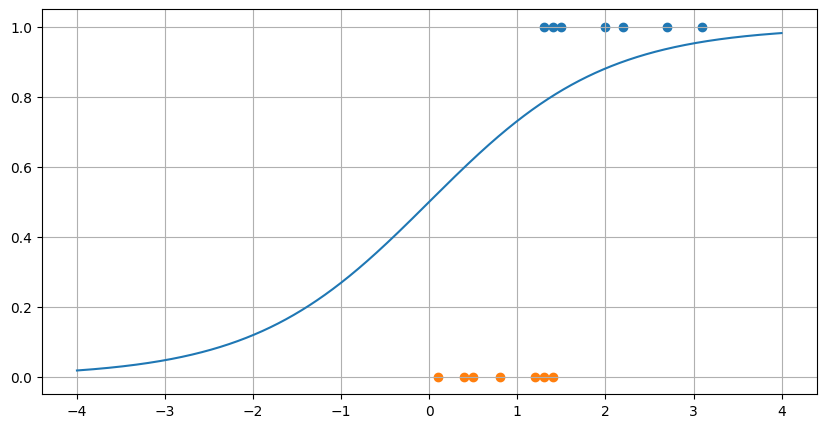

In [ ]:

fig = plt.figure(figsize=(10,5))
plt.scatter(C1[:,0],C1[:,1])
plt.scatter(C2[:,0],C2[:,1])
m, b = 1, 0
y = sigmoide(m*X+b)
plt.plot(X,y)
plt.grid()

In [ ]:
m = float(input("Qué tan agudo es el cambio de la sigmoide: "))
b = float(input("Cuánto deberíamos correr la sigmoide: "))
print(f"Usando un cambio {m} y un corrimiento {b}")

Qué tan agudo es el cambio de la sigmoide: 12
Cuánto deberíamos correr la sigmoide: -14
Usando un cambio 12.0 y un corrimiento -14.0


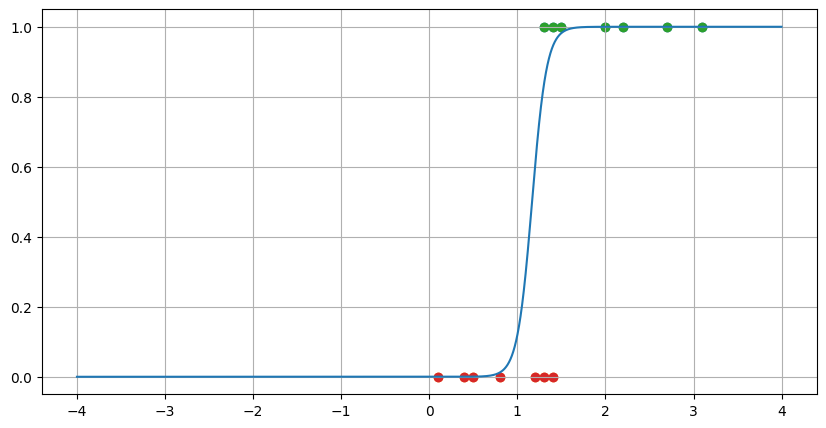

In [ ]:
y = sigmoide(m*X+b)

fig = plt.figure(figsize=(10,5))
plt.scatter(C1[:,0],C1[:,1])
plt.scatter(C2[:,0],C2[:,1])
plt.scatter(C1[:,0],C1[:,1])
plt.scatter(C2[:,0],C2[:,1])
y = sigmoide(m*X+b)
plt.plot(X,y)
plt.grid()